In [30]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split

In [31]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [32]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [33]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [34]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [36]:
X_train

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
...,...,...
534,30.0,8.6625
584,NaN,8.7125
493,71.0,49.5042
527,NaN,221.7792


In [37]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [38]:
X_test.tail()

,Age,Fare,Age_imputed
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0
251,29.0,10.4625,29.0


In [39]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([28.  , 18.  , 19.  , 14.5 , 54.  ,  0.75, 46.  , 30.  , 25.  ,
       13.  , 17.  , 19.  ,  6.  , 54.  , 36.5 , 48.  , 21.  , 18.  ,
       44.  , 31.  , 18.  , 31.  , 16.  , 20.  , 28.  , 18.  ,  4.  ,
       23.  , 45.  , 40.  , 31.  , 19.  , 17.  , 16.  , 37.  , 45.  ,
       21.  , 16.  , 58.  , 20.  , 14.  ,  3.  , 39.  , 32.  , 12.  ,
       31.  , 62.  ,  4.  , 48.  , 34.  , 27.  , 20.  , 19.  , 19.  ,
       34.  , 30.  , 20.  , 21.  , 24.  , 40.  , 21.  , 32.  , 56.  ,
       22.  , 16.  , 24.  , 48.  , 47.  , 32.  , 32.  , 54.  , 29.  ,
       61.  , 25.  , 29.  ,  9.  , 24.  , 16.  , 30.  , 24.  , 33.  ,
       24.  , 33.  ,  9.  , 38.  ,  1.  , 25.  , 30.  , 30.  , 19.  ,
       16.  , 19.  , 36.  , 50.  , 31.  , 27.  , 34.  , 32.  , 37.  ,
       34.  , 21.  , 34.  , 37.  , 26.  , 19.  , 27.  , 39.  ,  8.  ,
       36.  , 11.  , 38.  , 33.  , 45.  , 22.  , 27.  , 30.  , 30.  ,
       32.5 , 32.  , 50.  , 62.  , 65.  , 25.  , 43.  , 17.  , 29.  ,
       59.  , 18.  ,

In [40]:
X_train['Age'].isnull().sum()

148

In [41]:
# takig the random values from sample
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

In [42]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,30.0
493,71.0,49.5042,71.0
527,NaN,221.7792,45.0


C:\Users\Nishanijohnkrupakar\AppData\Local\Temp\ipykernel_15348\1393040810.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'],label='Original',hist=False)
c:\Users\Nishanijohnkrupakar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Nishanijohnkrupakar\AppData\Local\Temp\ipykernel_15348\1393040810.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt yo

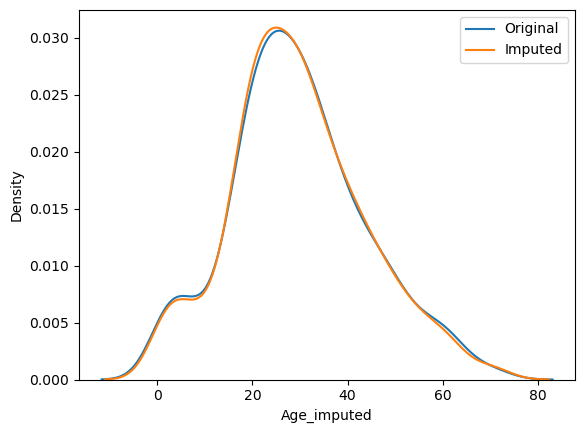

In [43]:
sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['Age_imputed'],label='Imputed',hist=False)

plt.legend()
plt.show()

In [44]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ',X_train['Age_imputed'].var())

Original variable variance:  204.3495133904614
Variance after random imputation:  199.94312776987607


In [45]:
X_train[['Fare','Age','Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,71.385157
Age,71.512440,204.349513,204.349513
Age_imputed,71.385157,204.349513,199.943128


<Axes: >

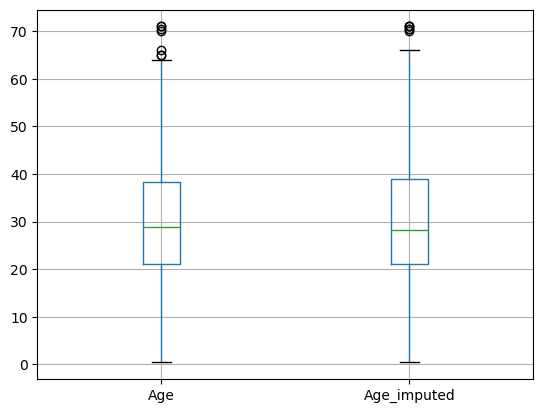

In [46]:
X_train[['Age','Age_imputed']].boxplot()

Categorical variables

In [47]:
data = pd.read_csv('house-train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [48]:
data.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [49]:
X = data
y = data['SalePrice']

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [51]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [52]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
303,NaN,TA,149900,TA,NaN
0,NaN,TA,208500,TA,NaN
1004,Gd,TA,181000,TA,Gd
927,Gd,TA,176000,TA,Gd
778,TA,TA,144000,TA,TA


In [54]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

C:\Users\Nishanijohnkrupakar\AppData\Local\Temp\ipykernel_15348\856878696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
C:\Users\Nishanijohnkrupakar\AppData\Local\Temp\ipykernel_15348\856878696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values
C:\Users\Nishanijohnkrupakar\AppData\Local\Temp\ipykernel_15348\856

In [55]:
temp = pd.concat([
    X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
    X_train['GarageQual_imputed'].value_counts() / len(X_train)
],axis=1)

temp.columns = ['original','imputed']

In [56]:
temp

,original,imputed
TA,0.951043,0.952911
Fa,0.037171,0.035959
Gd,0.009973,0.009418
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [57]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.494272,0.650954
TA,0.412439,0.535354
Fa,0.040917,0.056117
Po,0.027823,0.038159
Ex,0.024550,0.030303


C:\Users\Nishanijohnkrupakar\AppData\Local\Temp\ipykernel_15348\93567059.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
c:\Users\Nishanijohnkrupakar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Nishanijohnkrupakar\AppData\Local\Temp\ipykernel_15348\93567059.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed 

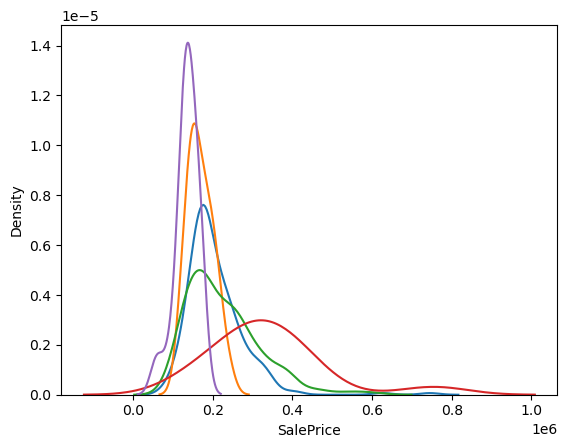

In [60]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
    
plt.show()

C:\Users\Nishanijohnkrupakar\AppData\Local\Temp\ipykernel_15348\722808554.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
c:\Users\Nishanijohnkrupakar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Nishanijohnkrupakar\AppData\Local\Temp\ipykernel_15348\722808554.py:2: UserWarning: 

`distplot` is a deprecated function and will b

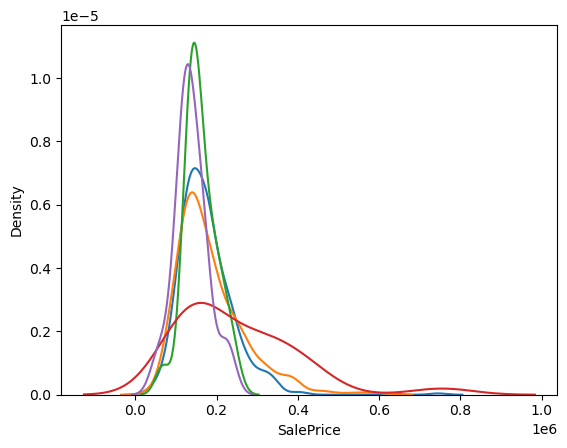

In [61]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.show()